In [1]:
#Mouting google drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/drive/MyDrive/condiDS'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training I pictures
train_I_dir = os.path.join(train_dir, 'I')

# Directory with our training II pictures
train_II_dir = os.path.join(train_dir, 'II')

# Directory with our training III pictures
train_III_dir = os.path.join(train_dir, 'III')

# Directory with our validation I pictures
validation_I_dir = os.path.join(validation_dir, 'I')

# Directory with our validation II pictures
validation_II_dir = os.path.join(validation_dir, 'II')

# Directory with our validation III pictures
validation_III_dir = os.path.join(validation_dir, 'III')

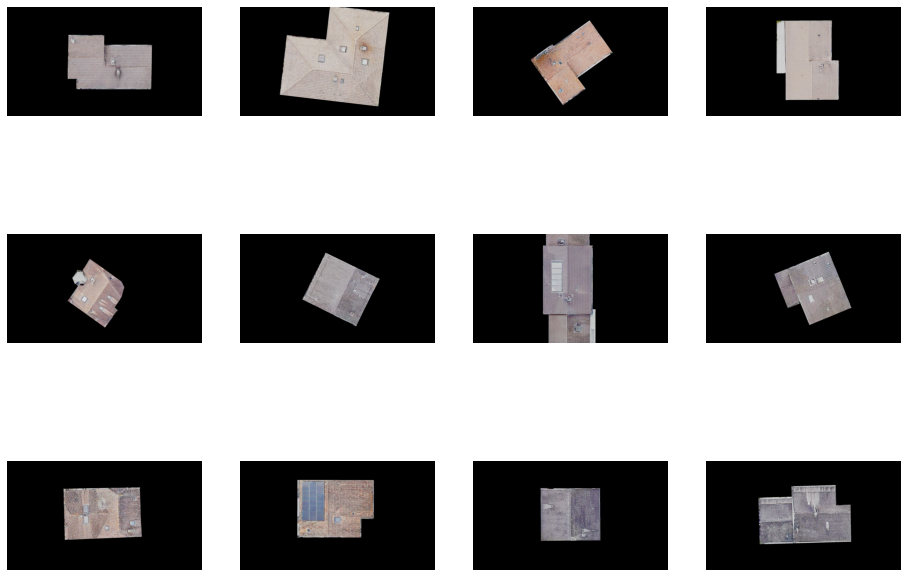

In [ ]:

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 5
train_I_fnames = os.listdir( train_I_dir )
train_II_fnames = os.listdir( train_II_dir )
train_III_fnames = os.listdir( train_III_dir )


next_I_pix = [os.path.join(train_I_dir, fname) 
                for fname in train_I_fnames[ pic_index-4:pic_index] 
               ]

next_II_pix = [os.path.join(train_II_dir, fname) 
                for fname in train_II_fnames[ pic_index-4:pic_index]
               ]

next_III_pix = [os.path.join(train_III_dir, fname) 
                for fname in train_III_fnames[ pic_index-4:pic_index]
               ]               

for i, img_path in enumerate(next_I_pix+next_II_pix+next_III_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# VGG Model

Image augmentation 

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

Resizing and normalizing images

In [ ]:

# Flow training images in batches of 4 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 4, class_mode = 'categorical', target_size = (224, 224))

# Flow validation images in batches of 4 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 4, class_mode = 'categorical', target_size = (224, 224))

Found 67 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


Loading model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 3 node for classification output
x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = len(train_generator), validation_steps = len(validation_generator), epochs = 50)

Epoch 1/50
17/17 [==============================] - 5s 311ms/step - loss: 1.1209 - acc: 0.4030 - val_loss: 1.2040 - val_acc: 0.3125
Epoch 2/50
17/17 [==============================] - 5s 291ms/step - loss: 1.1216 - acc: 0.4328 - val_loss: 1.2261 - val_acc: 0.3125
Epoch 3/50
17/17 [==============================] - 5s 290ms/step - loss: 1.1475 - acc: 0.3881 - val_loss: 1.2609 - val_acc: 0.3750
Epoch 4/50
17/17 [==============================] - 5s 290ms/step - loss: 1.1818 - acc: 0.3731 - val_loss: 1.2589 - val_acc: 0.3750
Epoch 5/50
17/17 [==============================] - 5s 293ms/step - loss: 1.0037 - acc: 0.4776 - val_loss: 1.4539 - val_acc: 0.3750
Epoch 6/50
17/17 [==============================] - 5s 292ms/step - loss: 1.2902 - acc: 0.2985 - val_loss: 1.2768 - val_acc: 0.3750
Epoch 7/50
17/17 [==============================] - 6s 338ms/step - loss: 1.1049 - acc: 0.4030 - val_loss: 1.2026 - val_acc: 0.3750
Epoch 8/50
17/17 [==============================] - 5s 293ms/step - loss: 1.

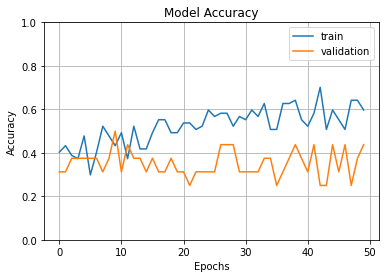

In [ ]:
fig1 = plt.gcf()
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

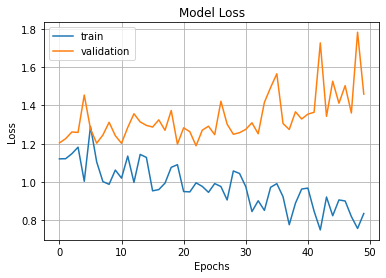

In [ ]:
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread(str(A[0]))
print(image.shape)


In [ ]:
import cv2
import numpy as np
image=cv2.imread('/content/drive/MyDrive/condiDS/validation/III/5_EGID_1007678.png')
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [ ]:
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 18ms/step
[[0.01748506 1.         0.9999865 ]]


# Resnet 50


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model2 = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:

for layer in base_model2.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model2.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 3 node for classification output
x = layers.Dense(3, activation='sigmoid')(x)

model2 = tf.keras.models.Model(base_model2.input, x)

model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
resnethist = model2.fit(train_generator, validation_data = validation_generator, steps_per_epoch = len(train_generator), validation_steps = len(validation_generator), epochs = 50)

Epoch 1/50
17/17 [==============================] - 9s 352ms/step - loss: 2.0387 - acc: 0.3284 - val_loss: 2.4949 - val_acc: 0.3125
Epoch 2/50
17/17 [==============================] - 5s 285ms/step - loss: 1.7205 - acc: 0.3433 - val_loss: 1.3282 - val_acc: 0.3125
Epoch 3/50
17/17 [==============================] - 5s 287ms/step - loss: 1.6192 - acc: 0.2985 - val_loss: 1.4083 - val_acc: 0.3125
Epoch 4/50
17/17 [==============================] - 5s 283ms/step - loss: 1.5080 - acc: 0.2985 - val_loss: 1.1992 - val_acc: 0.3750
Epoch 5/50
17/17 [==============================] - 5s 288ms/step - loss: 1.3912 - acc: 0.4179 - val_loss: 1.3407 - val_acc: 0.3125
Epoch 6/50
17/17 [==============================] - 5s 286ms/step - loss: 1.3684 - acc: 0.3731 - val_loss: 1.1274 - val_acc: 0.3125
Epoch 7/50
17/17 [==============================] - 5s 291ms/step - loss: 1.3155 - acc: 0.2687 - val_loss: 1.1063 - val_acc: 0.3125
Epoch 8/50
17/17 [==============================] - 5s 290ms/step - loss: 1.

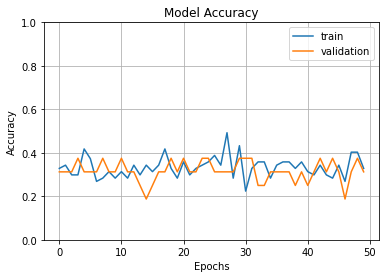

In [ ]:
fig1 = plt.gcf()
plt.plot(resnethist.history['acc'])
plt.plot(resnethist.history['val_acc'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

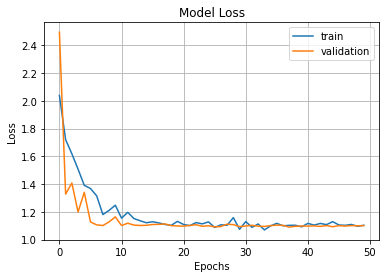

In [ ]:
plt.plot(resnethist.history['loss'])
plt.plot(resnethist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# EfficientNet

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 1.9 MB/s eta 0:00:00


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model3 = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model3.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model3.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 3 node for classification output
x = layers.Dense(3, activation='sigmoid')(x)

model3 = tf.keras.models.Model(base_model3.input, x)

model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:
model3.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
efnethist = model3.fit(train_generator, validation_data = validation_generator, steps_per_epoch = len(train_generator), validation_steps = len(validation_generator), epochs = 50)

Epoch 1/50
17/17 [==============================] - 13s 371ms/step - loss: 1.7432 - acc: 0.3284 - val_loss: 1.6564 - val_acc: 0.3125
Epoch 2/50
17/17 [==============================] - 5s 281ms/step - loss: 1.2264 - acc: 0.4478 - val_loss: 1.7973 - val_acc: 0.1875
Epoch 3/50
17/17 [==============================] - 5s 285ms/step - loss: 1.3912 - acc: 0.3881 - val_loss: 1.5763 - val_acc: 0.2500
Epoch 4/50
17/17 [==============================] - 5s 282ms/step - loss: 1.3229 - acc: 0.3881 - val_loss: 1.5852 - val_acc: 0.3125
Epoch 5/50
17/17 [==============================] - 5s 281ms/step - loss: 1.3943 - acc: 0.4776 - val_loss: 1.7092 - val_acc: 0.2500
Epoch 6/50
17/17 [==============================] - 5s 281ms/step - loss: 1.1513 - acc: 0.5075 - val_loss: 1.6579 - val_acc: 0.3125
Epoch 7/50
17/17 [==============================] - 5s 283ms/step - loss: 1.3633 - acc: 0.4030 - val_loss: 1.6403 - val_acc: 0.2500
Epoch 8/50
17/17 [==============================] - 5s 283ms/step - loss: 1

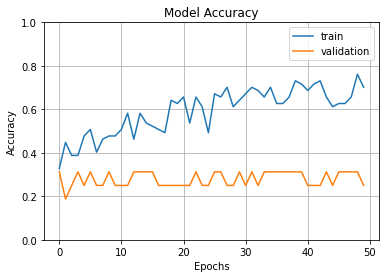

In [ ]:
fig1 = plt.gcf()
plt.plot(efnethist.history['acc'])
plt.plot(efnethist.history['val_acc'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

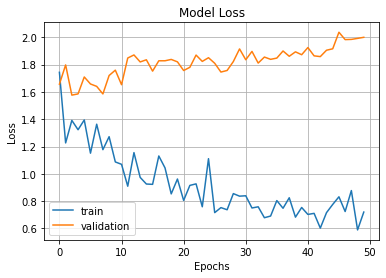

In [ ]:
plt.plot(efnethist.history['loss'])
plt.plot(efnethist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()